<a href="https://colab.research.google.com/github/Aruniaaa/NoteBooks-Dump/blob/main/classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here, I have written some code to make a classification model with the help of pytorch and a youtube [tutorial](https://www.youtube.com/watch?v=V_xro1bcAuA&t=2598s)

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
import requests
from pathlib import Path
import torch.nn.functional as F

In [ ]:
X_numpy, Y_numpy = make_circles(10000, noise=0.03, random_state=42)

In [ ]:
print(X_numpy[:5])
print(Y_numpy[:5])

[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]
[1 0 0 0 0]


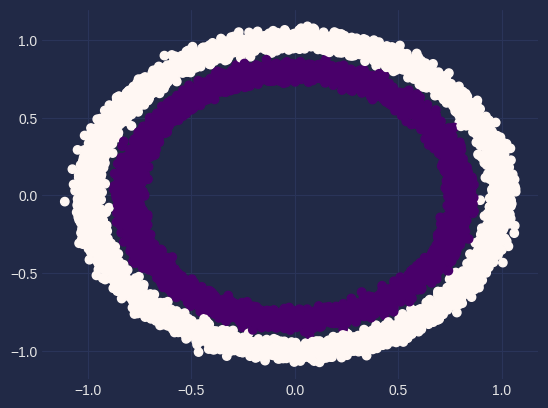

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.scatter(X_numpy[:, 0], X_numpy[:, 1], c=Y_numpy)

In [ ]:
X = torch.from_numpy(X_numpy).type(torch.float)
Y = torch.from_numpy(Y_numpy).type(torch.float)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
class BCModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(2, 8)
    nn.ReLU()
    self.l2 = nn.Linear(8, 16)
    nn.ReLU()
    self.l3 = nn.Linear(16, 1)

  def forward(self, x):
    return self.l3(F.relu(self.l2(F.relu(self.l1(x)))))

In [ ]:
model = BCModel().to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)


In [ ]:
def accuracy(Y_pred, Y_real):
  correct = torch.eq(Y_real.to(Y_pred.device), Y_pred.to(Y_pred.device)).sum().item()
  acc = (correct / len(Y_pred)) * 100
  return acc

In [ ]:
with torch.inference_mode():
  Y_logits = model(X_test.to(device))
  Y_probs = torch.sigmoid(Y_logits)
  Y_pred = torch.round(Y_probs)

print(accuracy(Y_pred, Y_test))

97100.0


In [ ]:
epochs = 100
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


for epoch in range(epochs):
  model.train()

  Y_logits = model(X_train).squeeze()
  Y_pred = torch.round(torch.sigmoid(Y_logits))

  acc = accuracy(Y_pred, Y_train)
  loss = loss_fn(Y_logits, Y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    Y_logits_test = model(X_test).squeeze()
    Y_pred_test = torch.round(torch.sigmoid(Y_logits_test))

    acc_test = accuracy(Y_pred_test, Y_test)
    loss_test = loss_fn(Y_logits_test, Y_test)

  if epoch % 10 == 0:
    print(f"Train accuracy: {acc} | Test accuracy: {acc_test}")
    print(f"Train loss: {loss:.2f} | Test loss: {loss_test:.2f}")
    print("-------------------------------------------------------")



Train accuracy: 50.3625 | Test accuracy: 51.449999999999996
Train loss: 0.70 | Test loss: 0.70
-------------------------------------------------------
Train accuracy: 61.18749999999999 | Test accuracy: 51.449999999999996
Train loss: 0.69 | Test loss: 0.69
-------------------------------------------------------
Train accuracy: 76.1875 | Test accuracy: 78.14999999999999
Train loss: 0.67 | Test loss: 0.67
-------------------------------------------------------
Train accuracy: 92.0875 | Test accuracy: 93.65
Train loss: 0.50 | Test loss: 0.46
-------------------------------------------------------
Train accuracy: 98.55000000000001 | Test accuracy: 98.6
Train loss: 0.16 | Test loss: 0.14
-------------------------------------------------------
Train accuracy: 99.3625 | Test accuracy: 99.35000000000001
Train loss: 0.05 | Test loss: 0.04
-------------------------------------------------------
Train accuracy: 99.725 | Test accuracy: 99.85000000000001
Train loss: 0.02 | Test loss: 0.02
----------

helper_functions.py already exists, skipping download


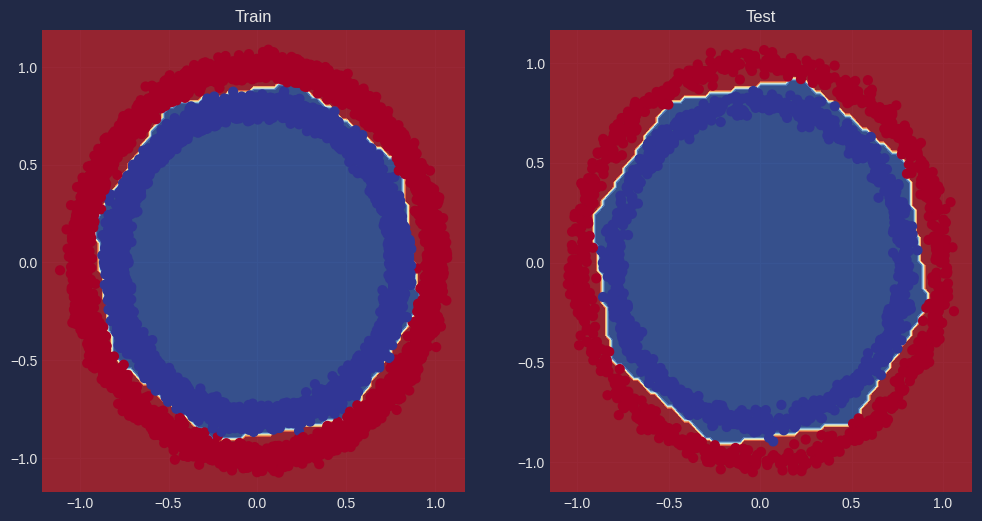

In [ ]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Changed the URL to the raw content URL
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, Y_test)

# Blobs

Blobs.

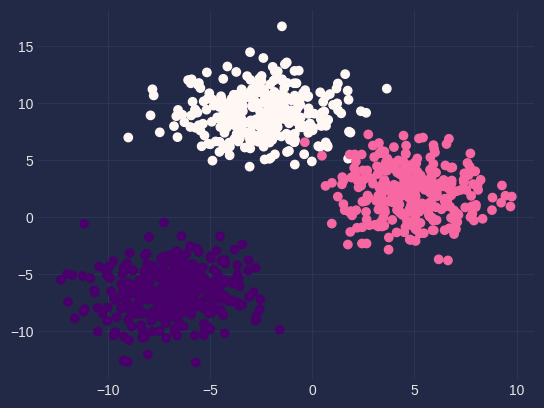

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X_numpy, Y_numpy = make_blobs(
    n_samples=1000, n_features=2, centers=3, cluster_std=2, random_state=42
)

X = torch.from_numpy(X_numpy).type(torch.float)
Y = torch.from_numpy(Y_numpy).type(torch.float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [ ]:
class Clustering(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(2, 8)
    self.l2 = nn.Linear(8, 16)
    self.l3 = nn.Linear(16, 3) # Changed output layer size to 3

  def forward(self, x):
    return self.l3(F.relu(self.l2(F.relu(self.l1(x)))))



model_b = Clustering().to(device)

In [ ]:
optimizer = torch.optim.Adam(model_b.parameters(), lr=0.1)

loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 100
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
  model_b.train()

  Y_logits_b_train = model_b(X_train)
  Y_pred_b_train = torch.argmax(Y_logits_b_train, dim=1)

  acc = accuracy(Y_pred_b_train, Y_train)
  loss = loss_fn(Y_logits_b_train, Y_train.long())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_b.eval()
  with torch.inference_mode():
    Y_logits_test = model_b(X_test)
    Y_pred_test = torch.argmax(Y_logits_test, dim=1)

    acc_test = accuracy(Y_pred_test, Y_test)
    loss_test = loss_fn(Y_logits_test, Y_test.long())

  if epoch % 10 == 0:
    print(f"Train accuracy: {acc} | Test accuracy: {acc_test}")
    print(f"Train loss: {loss:.2f} | Test loss: {loss_test:.2f}")
    print("-------------------------------------------------------")

Train accuracy: 66.5 | Test accuracy: 82.0
Train loss: 1.01 | Test loss: 0.39
-------------------------------------------------------
Train accuracy: 98.875 | Test accuracy: 100.0
Train loss: 0.06 | Test loss: 0.00
-------------------------------------------------------
Train accuracy: 99.5 | Test accuracy: 99.5
Train loss: 0.03 | Test loss: 0.04
-------------------------------------------------------
Train accuracy: 99.375 | Test accuracy: 100.0
Train loss: 0.02 | Test loss: 0.00
-------------------------------------------------------
Train accuracy: 99.5 | Test accuracy: 100.0
Train loss: 0.02 | Test loss: 0.00
-------------------------------------------------------
Train accuracy: 99.5 | Test accuracy: 100.0
Train loss: 0.01 | Test loss: 0.00
-------------------------------------------------------
Train accuracy: 99.5 | Test accuracy: 100.0
Train loss: 0.01 | Test loss: 0.00
-------------------------------------------------------
Train accuracy: 99.375 | Test accuracy: 100.0
Train l

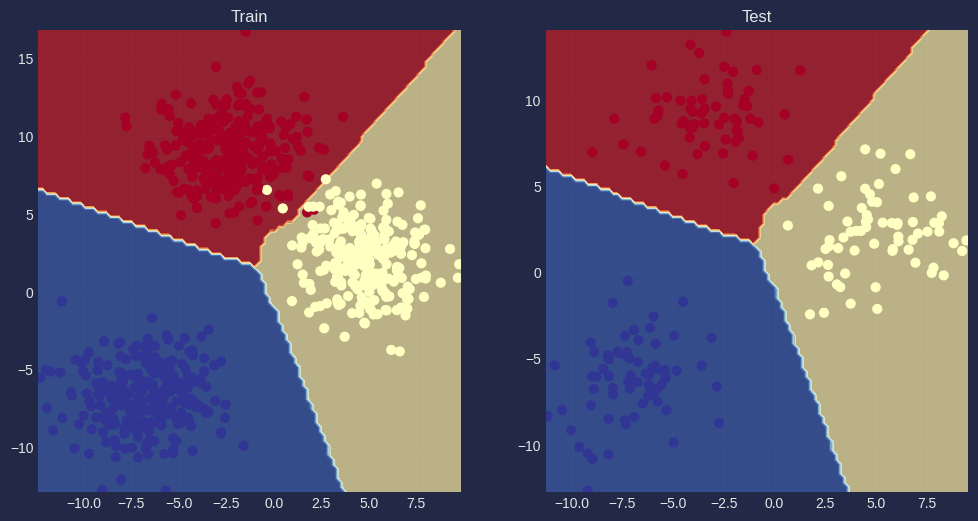

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_b, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_b, X_test, Y_test)